# Plotting Electric Fields in Python

As we've seen in class, when dealing with a finite set of point charges there is a simple, constructive way to compute the electric field of these charges: you just add up the electric fields of each of the charges. It's not too difficult to turn this construction into a function in python. I've done that here: 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#When a function definition has an argument like charges=[1], the value after the equal sign will be the default
#value of that argument when evaluating the function. Here this means that the default is a single charge at the 
#origin with q=1. 
def elec_field(x, y, x_coords=[0], y_coords=[0], charges=[1]):
    Ex = np.zeros_like(x)
    Ey = np.zeros_like(x)
    for x0, y0, q in zip(x_coords, y_coords, charges):
        scrR = np.sqrt((x - x0)**2 + (y - y0)**2) + 1e-6 #The 1e-6 is a simple way to avoid ever dividing by zero.
        Ex += q*(x - x0)/scrR**3
        Ey += q*(y - y0)/scrR**3
    return Ex, Ey

The first two inputs are the $x$ and $y$ coordinates of the points where the electric field will be computed, the field points. The next two arguments are arrays giving the $x$ and $y$ coordinates of each charge in the distribution. The last argument is an array that gives the charge of each particle in the distribution (including its sign). 

The zip function combines the three arrays of its arguments so that the for loop can run over each of their entries in one simple object. The for loop runs over each charge and computes its electric field at each field point and adds them up. 

Below I use this function to compute and plot the electric vector field of two point charges, one positive and one negative. I use essentially the same strategy as last week. The numpy function mgrid gives an array of evenly spaced point, here from -3 to 3 in the $x$ direction and from -3 to 3 in the $y$ direction, with 21 evenly spaced points in each direction. 

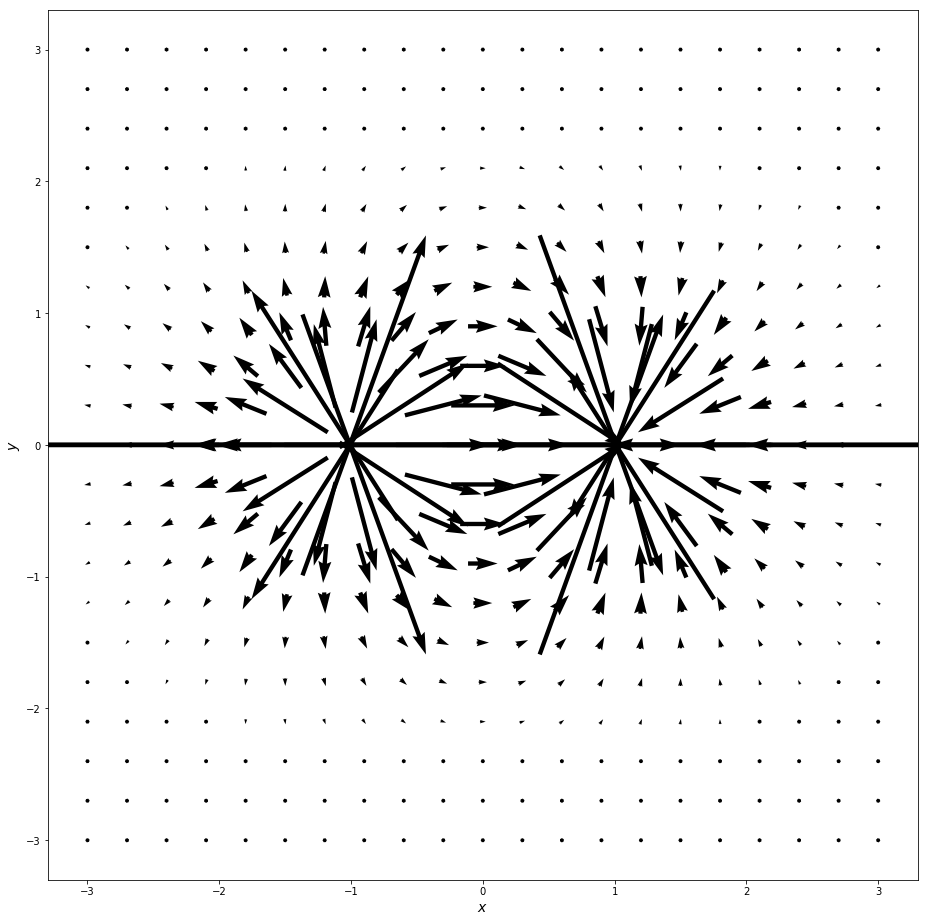

In [76]:
y, x = np.mgrid[-3:3:21j, -3:3:21j]
Ex, Ey = elec_field(x, y, x_coords=[-1, 1], y_coords=[0,0],charges=[1, -1])
comp_x = Ex
comp_y = Ey


plt.figure(figsize=(16, 16))
plt.quiver(x, y, comp_x, comp_y,
           scale_units="inches", scale=2, width=0.005, pivot="mid")
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$y$',fontsize=14)
plt.axis("image")

#plt.savefig("vector_field.png", dpi=300)
plt.show()

The trouble is that this doesn't look very good. The trouble is that as the magnitude of the field increases near the charges, the field vectors get very large and cross all over each other.

An alternative strategy is to use the vector field arrows to indicate the direction of the field, but normalize them so that they are always the same length. This way they won't cross, but we lose the information about the magnitude of the electric field. We can add the magnitude information back in by making the background colored. I'll use a contour plot to do that. 

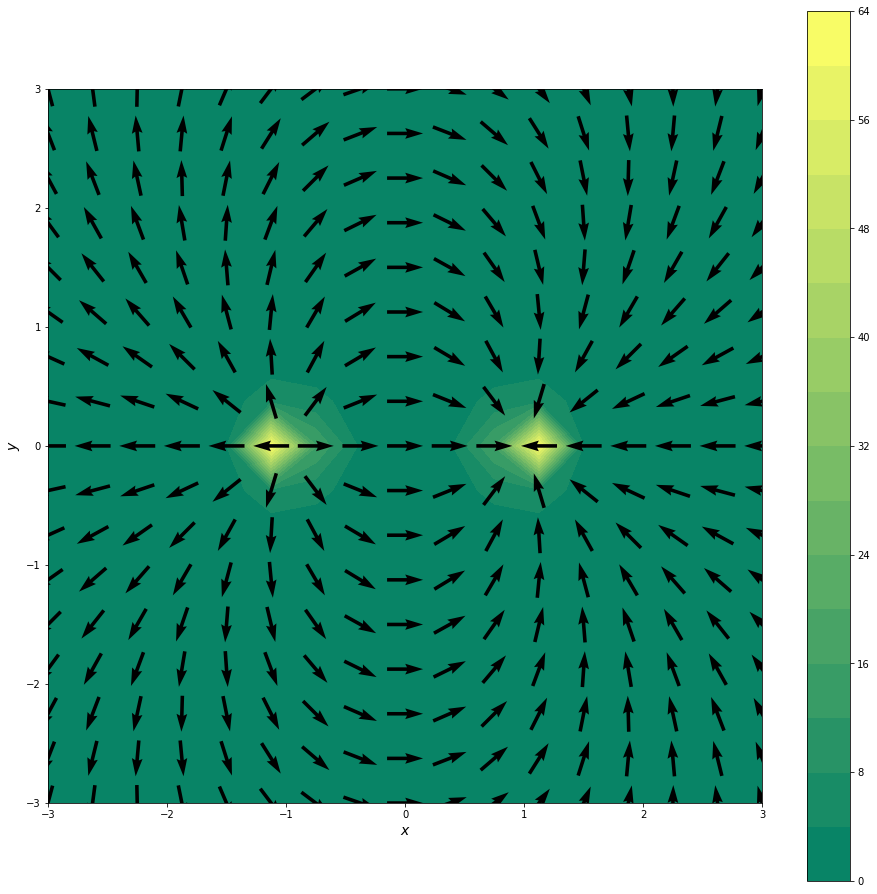

In [80]:
y, x = np.mgrid[-3:3:17j, -3:3:17j]
Ex, Ey = elec_field(x, y, x_coords=[-1, 1], y_coords=[0,0],
                    charges=[1, -1])
Emag = np.sqrt(Ex**2 + Ey**2)
dir_x = Ex/Emag
dir_y = Ey/Emag


plt.figure(figsize=(16, 16))
plt.contourf(x, y, Emag,  15, cmap="summer")
plt.colorbar()
plt.quiver(x, y, dir_x, dir_y,
           scale_units="inches", scale=2, width=0.005, pivot="mid")
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$y$',fontsize=14)
plt.axis("image")

#plt.savefig("vector_field.png", dpi=300)
plt.show()

This looks much better, but still has problems. One issue is that the contours look very polygonal. This is because we aren't computing the field at enough points. We can fix it by increasing the number of points in mgrid. But, that will cover the whole region in arrows. 

The trick to fix that is to compute the field at all the points and only plot the vectors at a subset of the points. We can do the latter by "slicing" the arrays of field points and only keeping half of them. You can keep a fraction of the points in an array using the slicing :: , for example x[::3,::3] picks out every third point in the x array. 

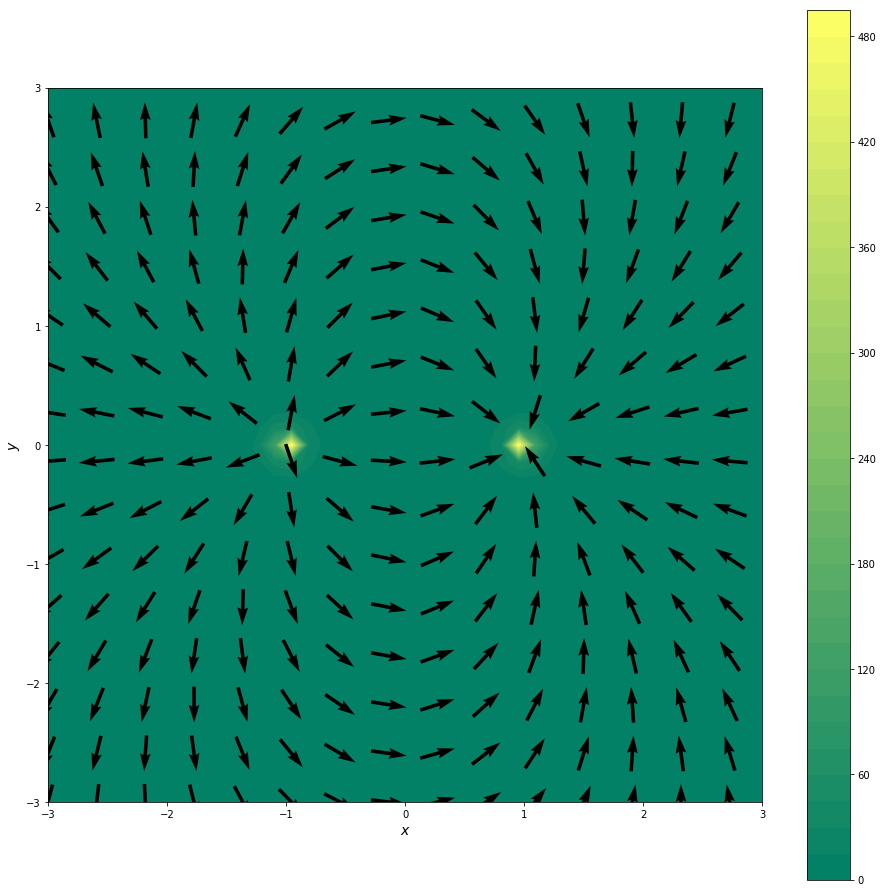

In [81]:
y, x = np.mgrid[-3:3:45j, -3:3:45j]
Ex, Ey = elec_field(x, y, x_coords=[-1, 1], y_coords=[0,0],
                    charges=[1, -1])
Emag = np.sqrt(Ex**2 + Ey**2)
dir_x = Ex/Emag
dir_y = Ey/Emag


plt.figure(figsize=(16, 16))
plt.contourf(x, y, Emag,  33, cmap="summer")
plt.colorbar()
plt.quiver(x[::3, ::3], y[::3, ::3], dir_x[::3, ::3], dir_y[::3, ::3],
           scale_units="inches", scale=2, width=0.005, pivot="mid")
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$y$',fontsize=14)
plt.axis("image")

#plt.savefig("vector_field.png", dpi=300)
plt.show()

We're getting there, but the magnitude information still isn't very helpful. It's for the same reason as before. The field gets huge right near the charges, but then drops off rapidly. The upshot is that all the contours are right near the charges. 

A way around this is to use the logarithm of the magnitude to make the contour plot. This flattens out the contour plot. This makes the information much easier to read, but should be accompanied by a warning for your reader!

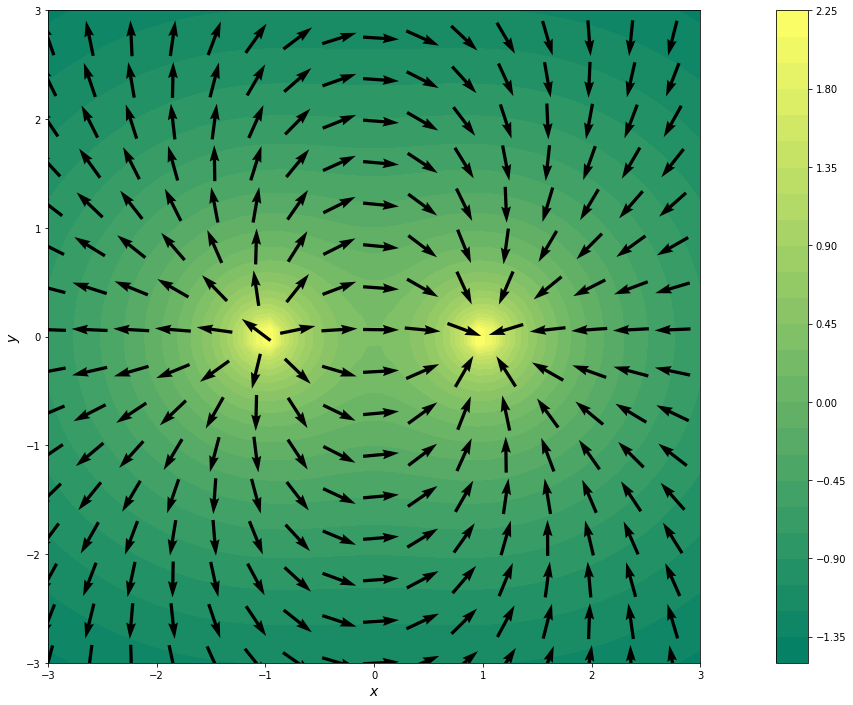

In [84]:
y, x = np.mgrid[-3:3:48j, -3:3:48j]
Ex, Ey = elec_field(x, y, x_coords=[-1, 1], y_coords=[0,0],
                    charges=[1, -1])
Emag = np.sqrt(Ex**2 + Ey**2)
dir_x = Ex/Emag
dir_y = Ey/Emag


plt.figure(figsize=(16, 12))
plt.contourf(x, y, np.log10(Emag),  33, cmap="summer")
plt.colorbar()
plt.quiver(x[::3, ::3], y[::3, ::3], dir_x[::3, ::3], dir_y[::3, ::3],
           scale_units="inches", scale=2, width=0.005, pivot="mid")
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$y$',fontsize=14)
plt.axis("image")

#plt.savefig("vector_field.png", dpi=300)
plt.show()

Exercise 1: Plot the electric vector field and magnitude of three charges sitting at the vertices of an equilateral triangle. Give two of the charges $q=+1$ and the last charge $q=-1$. 

Exercise 2: Plot the electric field of 4 charges sitting at the corners of a square with vertices $(-1,-1), (-1,1), (1,-1)$, and $(1,1)$. Let charges across from each other on the diagonal have opposite signs.